<a href="https://colab.research.google.com/github/MukeshMishraReloaded/projects/blob/main/OLA_Ensemble_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OLA - Ensemble Learning

# Problem Statement


- Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola.
- Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

- As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly.
- Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.


- You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition.
- You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)

- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

# Column Profiling:

- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates -cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

# Concepts:
- Ensemble Learning- Bagging
- Ensemble Learning- Boosting
- KNN Imputation of Missing Values
- Working with an imbalanced dataset
        


In [503]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [504]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [505]:
df_ola = pd.read_csv("ola_driver_scaler.csv")

In [506]:
df_ola.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [507]:
df = df_ola.copy()

# Missing values Treatment

In [508]:
(df.isna().sum()/len(df))*100

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [509]:
df.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [510]:
df.shape

(19104, 14)

In [511]:
df["Driver_ID"].nunique()


2381

In [512]:
df["Driver_ID"].value_counts()

Driver_ID
2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: count, Length: 2381, dtype: int64

In [513]:
df.drop(["Unnamed: 0"],axis = 1 , inplace=True)

In [514]:
df["Gender"].replace({0.0:"Male",1.0:"Female"},inplace=True)

# Data pre-processing:



In [515]:
# Summary statistics of the dataframe
summary_statistics = df.describe()

# Checking for missing values in the dataframe
missing_values = df.isnull().sum()

(summary_statistics, missing_values)

(          Driver_ID           Age  Education_Level         Income  Joining Designation         Grade  Total Business Value  Quarterly Rating
 count  19104.000000  19043.000000     19104.000000   19104.000000         19104.000000  19104.000000          1.910400e+04      19104.000000
 mean    1415.591133     34.668435         1.021671   65652.025126             1.690536      2.252670          5.716621e+05          2.008899
 std      810.705321      6.257912         0.800167   30914.515344             0.836984      1.026512          1.128312e+06          1.009832
 min        1.000000     21.000000         0.000000   10747.000000             1.000000      1.000000         -6.000000e+06          1.000000
 25%      710.000000     30.000000         0.000000   42383.000000             1.000000      1.000000          0.000000e+00          1.000000
 50%     1417.000000     34.000000         1.000000   60087.000000             1.000000      2.000000          2.500000e+05          2.000000
 75%  

In [516]:
from sklearn.impute import SimpleImputer

# Impute 'Age' with median
imputer_age = SimpleImputer(strategy='median')
df['Age'] = imputer_age.fit_transform(df[['Age']])

# Impute 'Gender' with mode
# Assuming 'Gender' is encoded (e.g., 0 and 1), find the mode and fill NA values with it
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)

# Create a binary feature using 'LastWorkingDate' to indicate current employment
# Assuming a missing value in 'LastWorkingDate' means the employee is currently employed
df['CurrentlyEmployed'] = df['LastWorkingDate'].isna().astype(int)

# Since 'LastWorkingDate' is now represented in 'CurrentlyEmployed', we may also choose to drop it or keep it for future reference
#df.drop(columns=['LastWorkingDate'], inplace=True)

In [517]:
#EDA - Visual

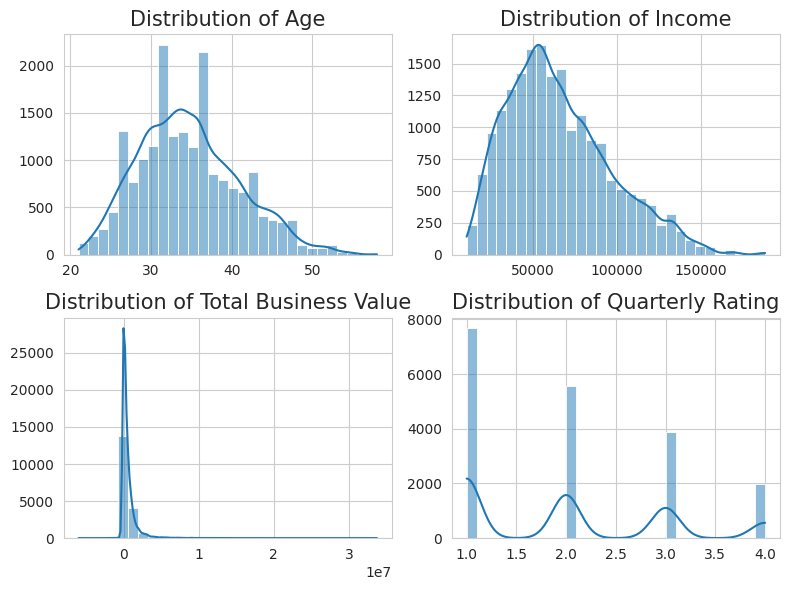

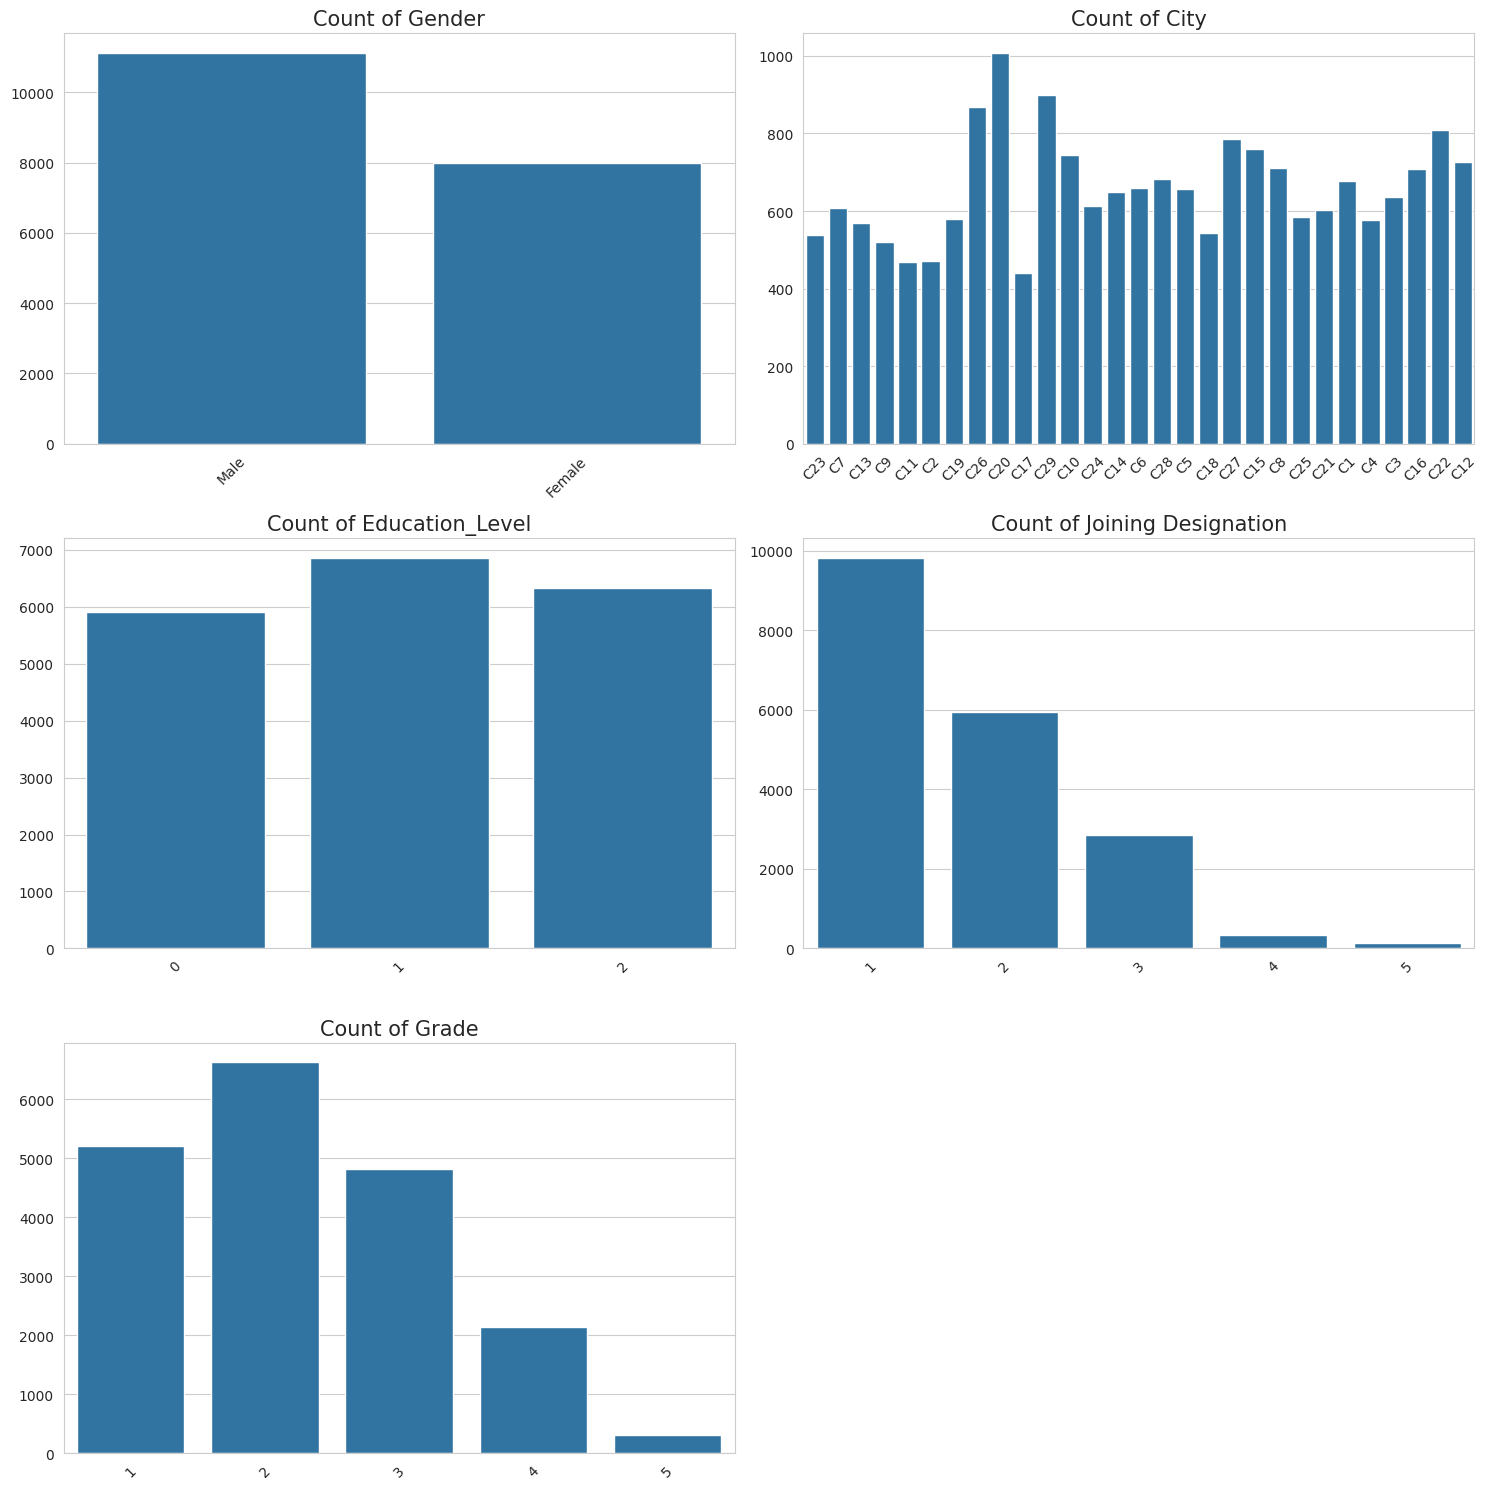

In [518]:

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a list of numerical columns to visualize distributions
numerical_cols = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']

# Plotting histograms for numerical columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Creating a list of categorical columns to visualize distributions
categorical_cols = ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade']

# Plotting countplots for categorical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # To prevent index out of range for the last subplot which is not needed
    if i < len(axes) - 1:
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Count of {col}', fontsize=15)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45)

# Removing the last subplot (empty one) as we have an odd number of categorical columns
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


# Insights:

The histograms for numerical columns show:

1. The 'Age' distribution is somewhat normal but slightly right-skewed, with most drivers in their 30s.

2. 'Income' also appears right-skewed, with a peak around 60,000, suggesting that most drivers earn around this amount.

3. 'Total Business Value' has a wide range, with a large spike at zero. This suggests many entries with no business value reported, and a few cases with very high values, which could be outliers or particularly successful instances.

4. 'Quarterly Rating' shows that most entries are rated as 1 or 2, with fewer occurrences of higher ratings.

The countplots for categorical columns indicate:

1. The 'Gender' distribution shows more entries for one gender, assuming 0 is male and 1 is female, the plot suggests there are more male drivers.

2. The 'City' plot reveals that the dataset includes drivers from various cities, with some cities having more drivers than others.

3. 'Education_Level' shows a relatively even distribution among the three education levels, with the middle level being slightly less common.

4. 'Joining Designation' and 'Grade' both show that lower designations/grades are more common than higher ones.

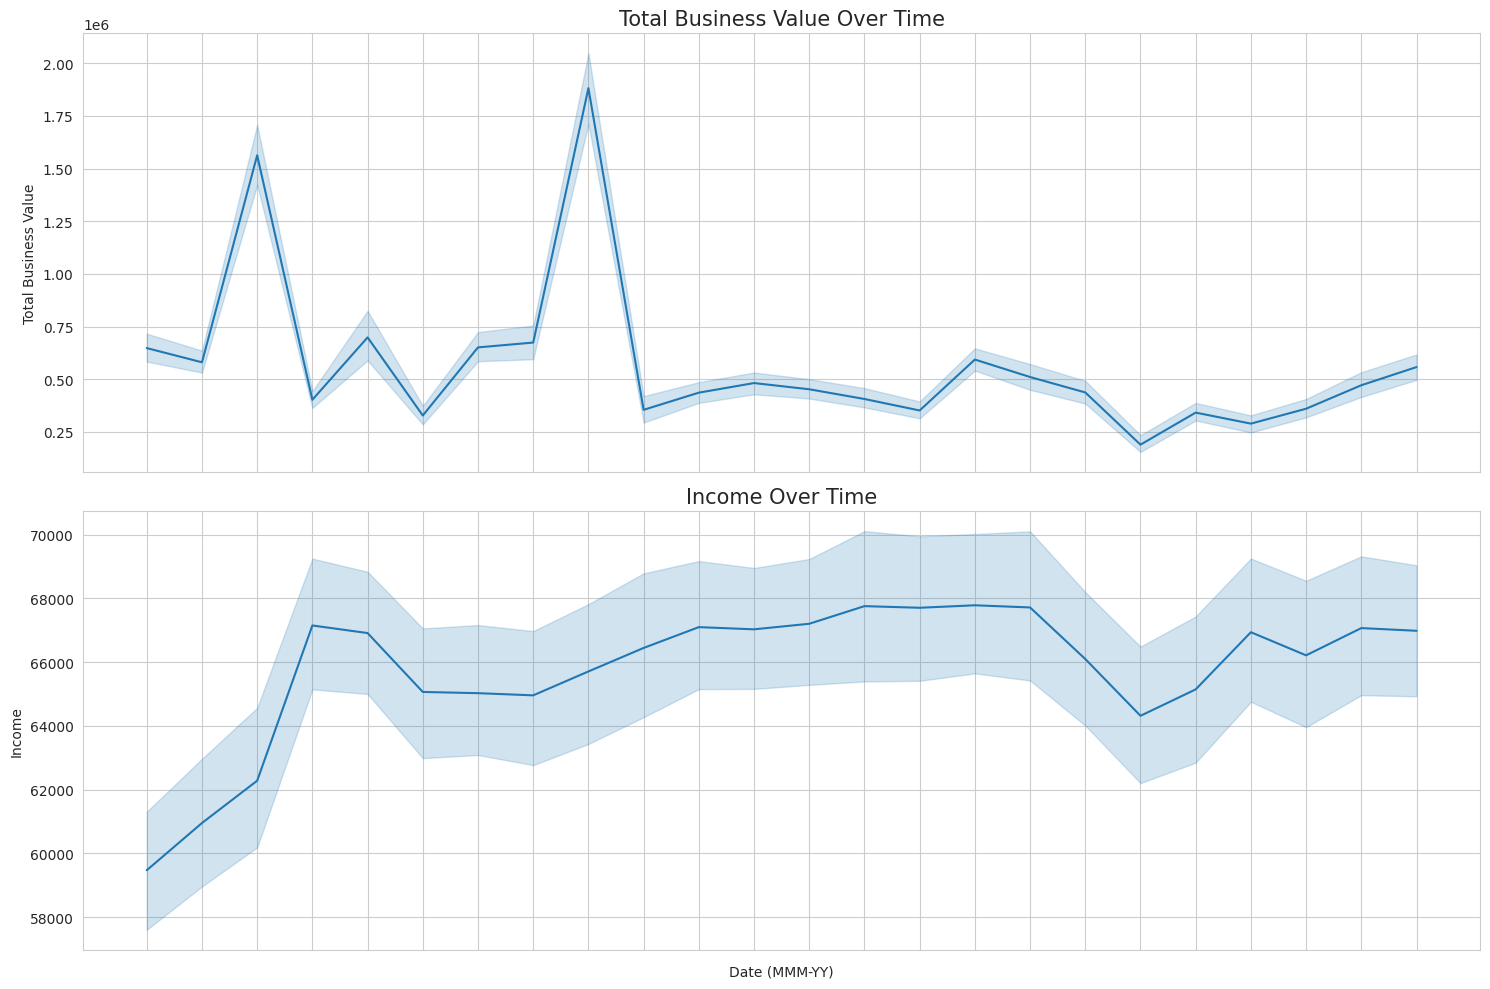

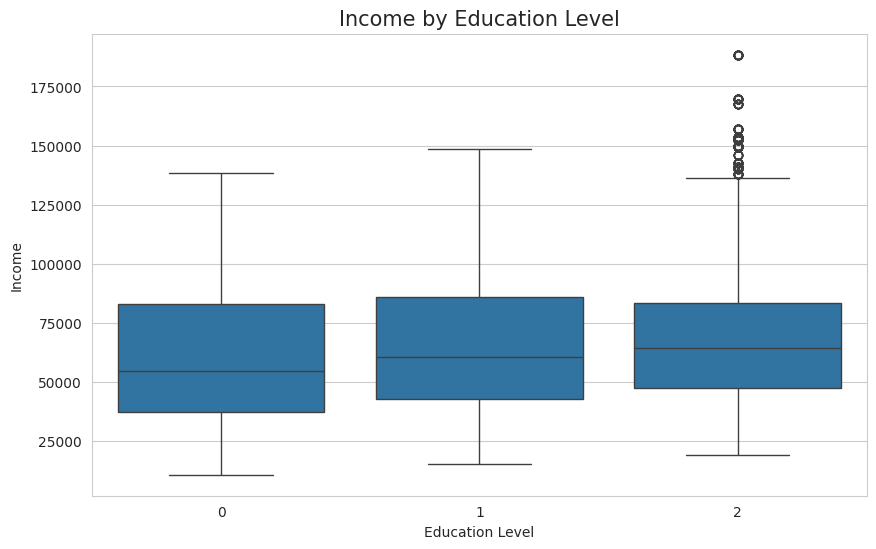

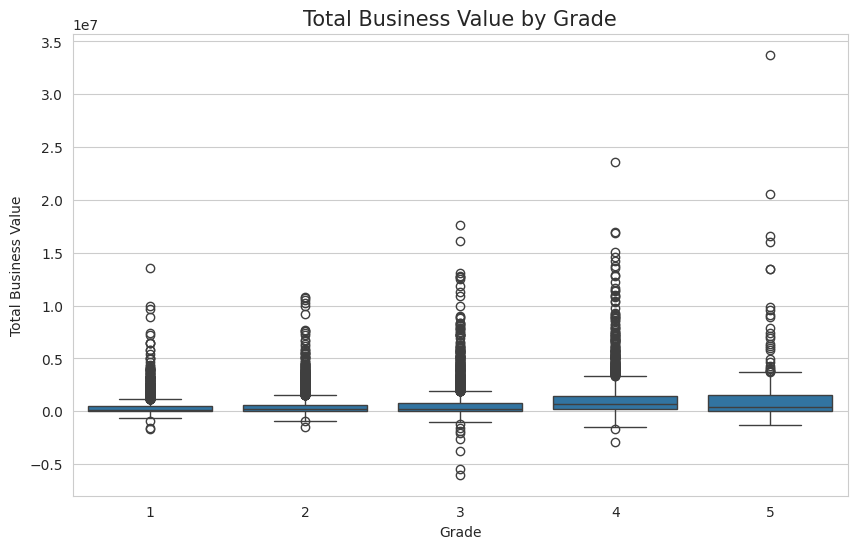

In [519]:
# Temporal analysis: Trends over time for 'Total Business Value' and 'Income'
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Total Business Value over time
sns.lineplot(data=df, x='MMM-YY', y='Total Business Value', ax=ax[0])

ax[0].set_title('Total Business Value Over Time', fontsize=15)
ax[0].set_ylabel('Total Business Value')
ax[0].set_xlabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)


# Income over time
sns.lineplot(data=df, x='MMM-YY', y='Income', ax=ax[1])
ax[1].set_title('Income Over Time', fontsize=15)
ax[1].set_ylabel('Income')
ax[1].set_xlabel('Date (MMM-YY)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Analyzing how income varies by education level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education_Level', y='Income')
plt.title('Income by Education Level', fontsize=15)
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

# Analyzing how Total Business Value varies by Grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Grade', y='Total Business Value')
plt.title('Total Business Value by Grade', fontsize=15)
plt.xlabel('Grade')
plt.ylabel('Total Business Value')
plt.show()


# Insights:

The temporal analysis reveals the following:

1. The 'Total Business Value' over time shows variability with certain peaks and troughs, indicating periods of higher and lower business activity. It might be useful to look into what events or seasons correspond to these changes.

2. 'Income Over Time' appears relatively stable, suggesting that driver income does not fluctuate much over the period shown. There is some slight upward trend, which might indicate gradual income increases or more high-income drivers being added over time.

From the boxplots:

1. 'Income by Education Level' indicates that higher education levels tend to have higher median incomes, which is an expected trend, suggesting that education may have an impact on income level.

2. 'Total Business Value by Grade' shows that higher grades tend to have a wider range of business values, with higher medians and more extreme values, implying that drivers with higher grades contribute more variably to the business value.


In [520]:
df[df["Driver_ID"]== 43]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,CurrentlyEmployed
239,01/01/19,43,27.0,Female,C15,0,12906,13/07/18,NaN,1,1,359890,1,1
240,02/01/19,43,27.0,Male,C15,0,12906,13/07/18,20/02/19,1,1,0,1,0


# Data aggregation :

In [521]:
# Step 1: Define the custom aggregation function
def unique_single_or_multiple_value(series):
    unique_values = series.dropna().unique()
    if len(unique_values) == 1:
        return unique_values[0]  # Return the single date or value if it's unique
    elif len(unique_values) > 1:
        return list(unique_values)  # Return a list of dates/values if there are multiple
    else:
        return np.nan  # Return NaN if the series is empty or all values are NaN

# Step 2: Aggregate the DataFrame by 'Driver_ID'
df_aggregated = df.groupby(["Driver_ID"]).aggregate({
    "MMM-YY": 'count',
    "Age": 'max',
    "Gender": 'max',
    "City": unique_single_or_multiple_value,
    "Education_Level": 'max',
    "Income": 'mean',
    "CurrentlyEmployed": 'max',
    "LastWorkingDate": unique_single_or_multiple_value,
    "Dateofjoining": unique_single_or_multiple_value,
    "Joining Designation": unique_single_or_multiple_value,
    "Grade": 'mean',
    "Total Business Value": 'sum',
    "Quarterly Rating": 'mean'
}).reset_index()

# Step 3: Rename columns in the aggregated DataFrame
final_data = df_aggregated.rename(columns={
    "MMM-YY": "NumberOfRecords",
    "Joining Designation": "Joining_Designation",
    "Total Business Value": "Total_Business_Value",
    "Quarterly Rating": "Quarterly_Rating"
})

# Step 4: Prepare LastWorkingDate data by getting the most recent date for each 'Driver_ID'
# Merge the most recent 'LastWorkingDate' back into the aggregated data.
last_working_date_series = df.groupby("Driver_ID")["LastWorkingDate"].apply(lambda x: x.dropna().unique()[-1] if len(x.dropna().unique()) > 0 else None)

# Drop 'LastWorkingDate' from 'final_data' if it exists
final_data.drop(columns=["LastWorkingDate"], inplace=True)

# Merge the most recent 'LastWorkingDate' with 'final_data'
final_data = pd.merge(
    left=last_working_date_series.reset_index(),
    right=final_data,
    on="Driver_ID",
    how="outer"
)

In [522]:
final_data.head(5)

,Driver_ID,LastWorkingDate,NumberOfRecords,Age,Gender,City,Education_Level,Income,CurrentlyEmployed,Dateofjoining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,03/11/19,3,28.0,Male,C23,2,57387.0,1,24/12/18,1,1.0,1715580,2.0
1,2,None,2,31.0,Male,C7,2,67016.0,1,11/06/20,2,2.0,0,1.0
2,4,27/04/20,5,43.0,Male,C13,2,65603.0,1,12/07/19,2,2.0,350000,1.0
3,5,03/07/19,3,29.0,Male,C9,0,46368.0,1,01/09/19,1,1.0,120360,1.0
4,6,None,5,31.0,Female,C11,1,78728.0,1,31/07/20,3,3.0,1265000,1.6


In [523]:
final_data.head(5)

,Driver_ID,LastWorkingDate,NumberOfRecords,Age,Gender,City,Education_Level,Income,CurrentlyEmployed,Dateofjoining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,03/11/19,3,28.0,Male,C23,2,57387.0,1,24/12/18,1,1.0,1715580,2.0
1,2,None,2,31.0,Male,C7,2,67016.0,1,11/06/20,2,2.0,0,1.0
2,4,27/04/20,5,43.0,Male,C13,2,65603.0,1,12/07/19,2,2.0,350000,1.0
3,5,03/07/19,3,29.0,Male,C9,0,46368.0,1,01/09/19,1,1.0,120360,1.0
4,6,None,5,31.0,Female,C11,1,78728.0,1,31/07/20,3,3.0,1265000,1.6


In [524]:
data = final_data.copy()

## Target: Whether the driver has left the company or not - If the driver has a last working day, it shall have the value 1, and 0 otherwise.

In [525]:
data["Churn"] = data["LastWorkingDate"].fillna(0)

In [526]:
def apply_0_1(y):
    if y == 0:
        return 0
    if y != 0:
        return 1


In [527]:
data["Churn"] = data["Churn"].apply(apply_0_1)

In [528]:
data["Churn"].value_counts()

Churn
1    1616
0     765
Name: count, dtype: int64

In [529]:
data["Churn"].value_counts(normalize=True)*100

Churn
1    67.870643
0    32.129357
Name: proportion, dtype: float64

# Data distribution:

*   Drivers who churned (Class 1) --> 68%
*   Drivers who did not churn (Class 0) --> 32%


- Tha the data is **imbalanced**.

In [530]:
data["Total_Business_Value"] = data["Total_Business_Value"].replace({0:np.nan})

In [531]:
# Step 2: Convert to datetime
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'], format='%d/%m/%y')

# Check the conversion
print(data['Dateofjoining'].nunique())

869


#### Converting date columns into Datatime format :

In [532]:
# Step 2: Convert to datetime
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'], format='%d/%m/%y')

# Check the conversion
print(data['LastWorkingDate'].nunique())

493


In [533]:
data["Dateofjoining"] = pd.to_datetime(data["Dateofjoining"])
data["LastWorkingDate"] = pd.to_datetime(data["LastWorkingDate"])

In [534]:
data["joining_Year"] = data["Dateofjoining"].dt.year


In [535]:
data["joining_month"] = data["Dateofjoining"].dt.month

# Missing values:

In [536]:
(data.isna().sum()/len(data))*100

Driver_ID                0.000000
LastWorkingDate         32.129357
NumberOfRecords          0.000000
Age                      0.000000
Gender                   0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
CurrentlyEmployed        0.000000
Dateofjoining            0.000000
Joining_Designation      0.000000
Grade                    0.000000
Total_Business_Value    30.197396
Quarterly_Rating         0.000000
Churn                    0.000000
joining_Year             0.000000
joining_month            0.000000
dtype: float64

In [537]:
data["Churn"].value_counts(normalize=True)*100

Churn
1    67.870643
0    32.129357
Name: proportion, dtype: float64

# Feature Engineering :

**Whether** the quarterly rating has increased for the driver? -

Assign a value of 1 for those drivers whose quarterly rating have increased, and 0 otherwise

   

  

In [538]:
def app_rating_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [539]:
Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(app_rating_inc)

In [540]:
data = pd.merge(left = Quarterly_Rating_increased,
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [541]:
data["Quarterly_Rating_increased"] = data["Quarterly Rating"]

In [542]:
data.drop(["Quarterly Rating"],axis=1,inplace=True)

**Whether** the monthly income has increased for the driver?

- Assign 1 for those whose monthly incomes have increased; and 0 otherwise.

In [543]:
def app_income_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [544]:
df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income")

Driver_ID
1       0
2       0
4       0
5       0
6       0
       ..
2784    0
2785    0
2786    0
2787    0
2788    0
Name: Increased_Income, Length: 2381, dtype: int64

In [545]:
data = pd.merge(left = df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income"),
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [546]:
data.head(5)

,Driver_ID,Increased_Income,LastWorkingDate,NumberOfRecords,Age,Gender,City,Education_Level,Income,CurrentlyEmployed,Dateofjoining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,joining_month,Quarterly_Rating_increased
0,1,0,2019-11-03,3,28.0,Male,C23,2,57387.0,1,2018-12-24,1,1.0,1715580.0,2.0,1,2018,12,0
1,2,0,NaT,2,31.0,Male,C7,2,67016.0,1,2020-06-11,2,2.0,NaN,1.0,0,2020,6,0
2,4,0,2020-04-27,5,43.0,Male,C13,2,65603.0,1,2019-07-12,2,2.0,350000.0,1.0,1,2019,7,0
3,5,0,2019-07-03,3,29.0,Male,C9,0,46368.0,1,2019-09-01,1,1.0,120360.0,1.0,1,2019,9,0
4,6,0,NaT,5,31.0,Female,C11,1,78728.0,1,2020-07-31,3,3.0,1265000.0,1.6,0,2020,7,1


In [547]:
ola_data = data.copy()

In [548]:
ola_data["Gender"].replace({"Male":0,
                       "Female":1},inplace=True)

In [551]:
ola_data['Total_Business_Value'] = ola_data['Total_Business_Value'].fillna(0)
ola_data[['Driver_ID', 'Total_Business_Value']]


,Driver_ID,Total_Business_Value
0,1,1715580.0
1,2,0.0
2,4,350000.0
3,5,120360.0
4,6,1265000.0
...,...,...
2376,2784,21748820.0
2377,2785,0.0
2378,2786,2815090.0
2379,2787,977830.0


In [552]:
ola_data.drop(["Driver_ID"],axis = 1, inplace=True)

In [553]:
ola_data.isna().sum()

Increased_Income                0
LastWorkingDate               765
NumberOfRecords                 0
Age                             0
Gender                          0
City                            0
Education_Level                 0
Income                          0
CurrentlyEmployed               0
Dateofjoining                   0
Joining_Designation             0
Grade                           0
Total_Business_Value            0
Quarterly_Rating                0
Churn                           0
joining_Year                    0
joining_month                   0
Quarterly_Rating_increased      0
dtype: int64

In [554]:
ola_data.head(2)

,Increased_Income,LastWorkingDate,NumberOfRecords,Age,Gender,City,Education_Level,Income,CurrentlyEmployed,Dateofjoining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,joining_month,Quarterly_Rating_increased
0,0,2019-11-03,3,28.0,0,C23,2,57387.0,1,2018-12-24,1,1.0,1715580.0,2.0,1,2018,12,0
1,0,NaT,2,31.0,0,C7,2,67016.0,1,2020-06-11,2,2.0,0.0,1.0,0,2020,6,0


In [555]:
impute_val = pd.to_datetime("2021-06-01")

In [556]:
ola_data["LastWorkingDate"] = ola_data["LastWorkingDate"].fillna(impute_val)

In [557]:
(ola_data["LastWorkingDate"] - ola_data["Dateofjoining"])

0       314 days
1       355 days
2       290 days
3       -60 days
4       305 days
          ...   
2376   2056 days
2377     61 days
2378    418 days
2379    334 days
2380    299 days
Length: 2381, dtype: timedelta64[ns]

In [558]:
ola_data["Driver_tenure_days"] = (ola_data["LastWorkingDate"] - ola_data["Dateofjoining"])

In [559]:
ola_data["Driver_tenure_days"] = ola_data["Driver_tenure_days"].dt.days

In [560]:
ola_data.drop(["LastWorkingDate","Dateofjoining"],inplace=True,axis = 1)

In [561]:
ola_data.drop(["Driver_tenure_days"],inplace=True,axis = 1)

In [562]:
ola_data.head(2)

,Increased_Income,NumberOfRecords,Age,Gender,City,Education_Level,Income,CurrentlyEmployed,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,joining_month,Quarterly_Rating_increased
0,0,3,28.0,0,C23,2,57387.0,1,1,1.0,1715580.0,2.0,1,2018,12,0
1,0,2,31.0,0,C7,2,67016.0,1,2,2.0,0.0,1.0,0,2020,6,0


In [563]:
ola_data.columns

Index(['Increased_Income', 'NumberOfRecords', 'Age', 'Gender', 'City', 'Education_Level', 'Income', 'CurrentlyEmployed', 'Joining_Designation', 'Grade', 'Total_Business_Value', 'Quarterly_Rating', 'Churn', 'joining_Year', 'joining_month', 'Quarterly_Rating_increased'], dtype='object')

In [564]:
ola_data["Grade"] = np.round(ola_data["Grade"])

In [565]:
ola_data["Quarterly_Rating"]= ola_data["Quarterly_Rating"].round()

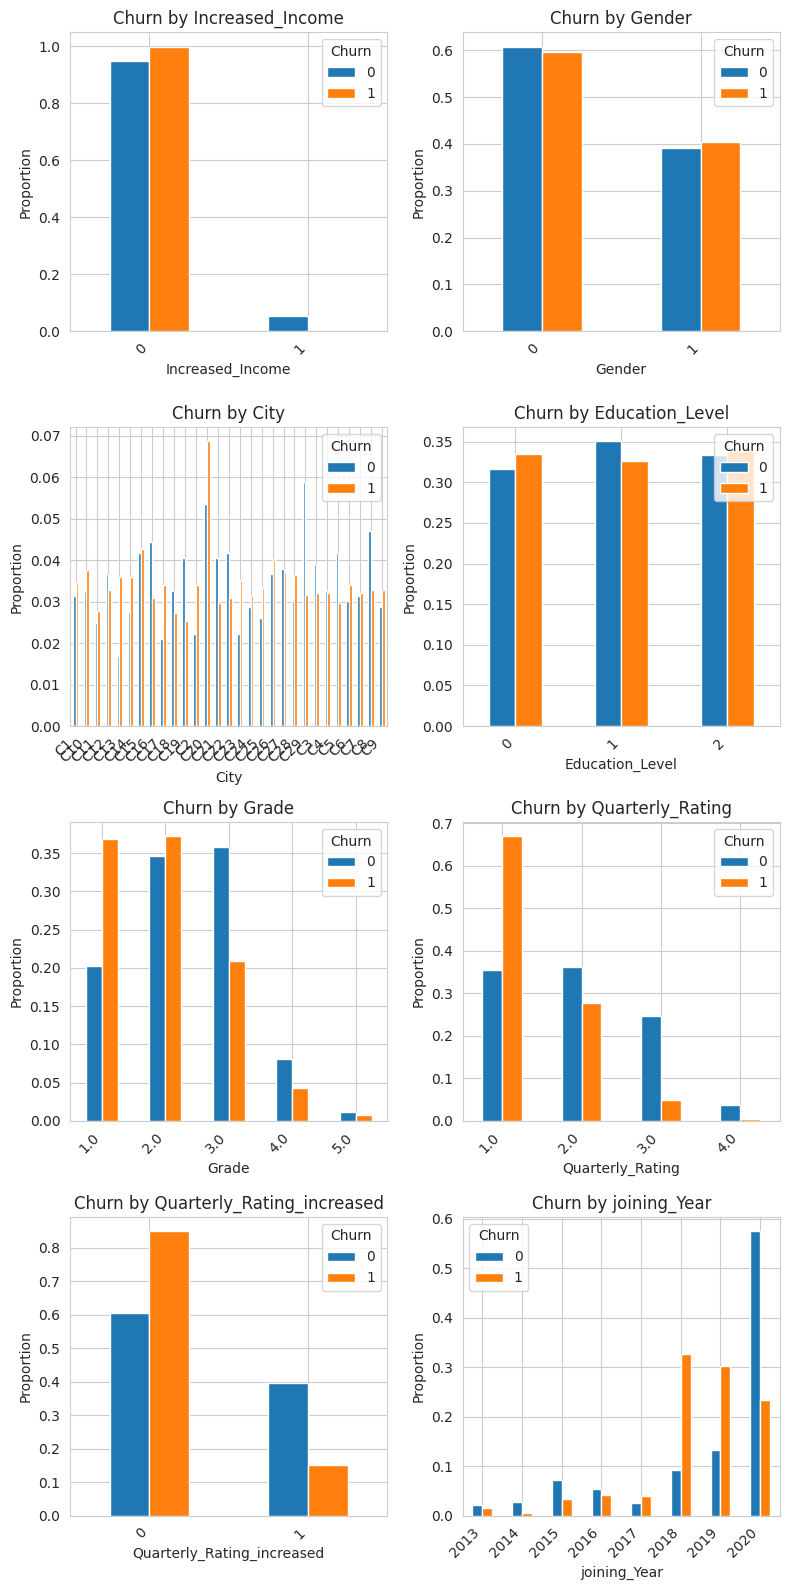

In [566]:
import pandas as pd
import matplotlib.pyplot as plt

# Example categorical features list
categorical_features = ['Increased_Income', 'Gender', 'City', 'Education_Level', 'Grade', 'Quarterly_Rating', 'Quarterly_Rating_increased', "joining_Year"]

# Applying lambda function to convert lists to strings if necessary
for col in categorical_features:
    ola_data[col] = ola_data[col].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)

# Plotting
num_plots = len(categorical_features)
cols = 2  # Number of columns in the grid
rows = (num_plots // cols) + (num_plots % cols)  # Number of rows in the grid

fig, axes = plt.subplots(rows, cols, figsize=(8, 4 * rows))

for idx, col in enumerate(categorical_features):
    row = idx // cols
    column = idx % cols
    ax = axes[row, column] if rows > 1 else axes[column]

    table = pd.crosstab(index=ola_data[col], columns=ola_data["Churn"], normalize="columns")
    table.plot(kind="bar", ax=ax)
    ax.set_title(f"Churn by {col}")
    ax.set_ylabel("Proportion")
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Remove any empty subplots
if num_plots % cols != 0:
    for j in range(num_plots % cols, cols):
        fig.delaxes(axes[rows-1, j])

plt.tight_layout()
plt.show()


In [567]:
ola_data.isna().sum()

Increased_Income              0
NumberOfRecords               0
Age                           0
Gender                        0
City                          0
Education_Level               0
Income                        0
CurrentlyEmployed             0
Joining_Designation           0
Grade                         0
Total_Business_Value          0
Quarterly_Rating              0
Churn                         0
joining_Year                  0
joining_month                 0
Quarterly_Rating_increased    0
dtype: int64

## SimpleImputer

In [569]:
from sklearn.impute import SimpleImputer

In [570]:
imputer = SimpleImputer(strategy='most_frequent')

In [571]:
ola_data["Gender"] = imputer.fit_transform(X=ola_data["Gender"].values.reshape(-1,1),y=ola_data["Churn"].values.reshape(-1,1))

In [572]:
ola_data["Gender"].value_counts(dropna=False)

Gender
0    1427
1     954
Name: count, dtype: int64

In [573]:
ola_data.isna().sum()

Increased_Income              0
NumberOfRecords               0
Age                           0
Gender                        0
City                          0
Education_Level               0
Income                        0
CurrentlyEmployed             0
Joining_Designation           0
Grade                         0
Total_Business_Value          0
Quarterly_Rating              0
Churn                         0
joining_Year                  0
joining_month                 0
Quarterly_Rating_increased    0
dtype: int64

## TargetEncoder

In [574]:
!pip install category_encoders

In [575]:
from category_encoders import TargetEncoder
te = TargetEncoder()

In [576]:
ola_data["City"] = te.fit_transform(X = ola_data["City"],y = ola_data["Churn"])



In [577]:
ola_data["joining_Year"] = te.fit_transform(X = ola_data["joining_Year"],y = ola_data["Churn"])


In [578]:
ola_data.head(2)

,Increased_Income,NumberOfRecords,Age,Gender,City,Education_Level,Income,CurrentlyEmployed,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,joining_month,Quarterly_Rating_increased
0,0,3,28.0,0,0.769859,2,57387.0,1,1,1.0,1715580.0,2.0,1,2018,12,0
1,0,2,31.0,0,0.684190,2,67016.0,1,2,2.0,0.0,1.0,0,2020,6,0


<Axes: >

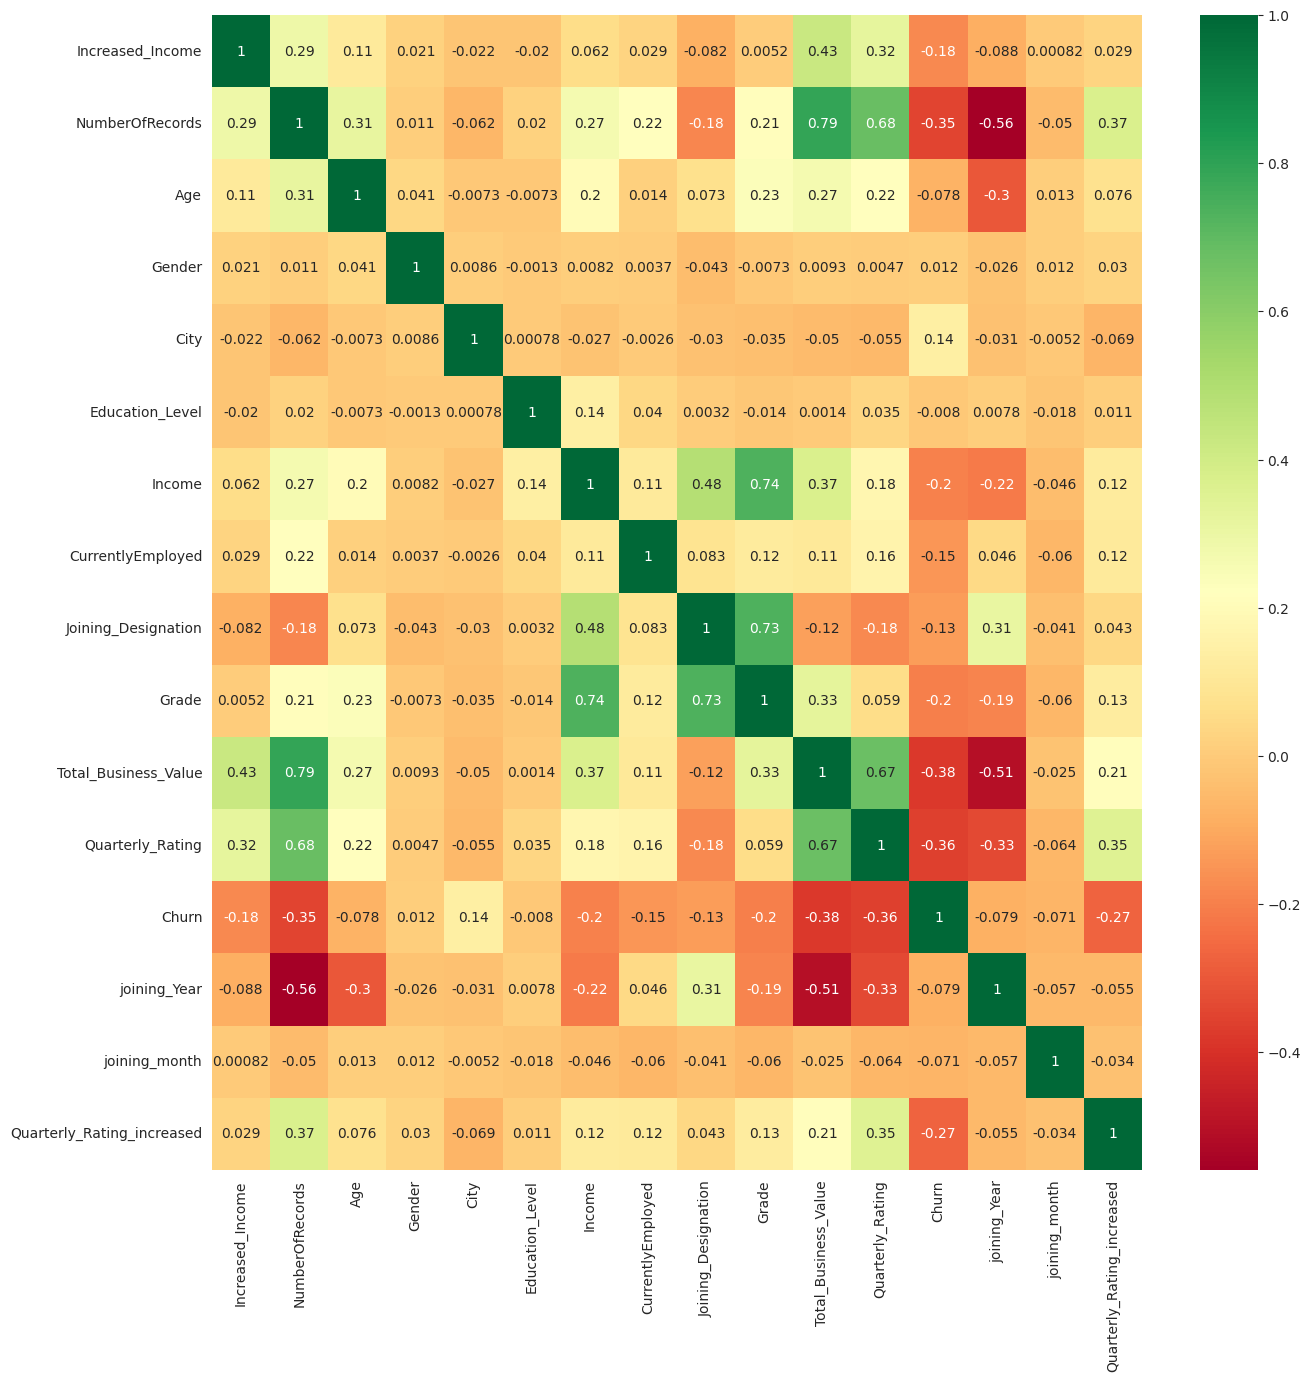

In [579]:
plt.figure(figsize=(15, 15))
sns.heatmap(ola_data.corr(),annot=True, cmap="RdYlGn", annot_kws={"size":10})

sns.heatmap(ola_data.corr())

In [580]:
X = ola_data.drop(["Churn"],axis = 1)
y = ola_data["Churn"]

## KNNImputer

In [581]:
from sklearn.impute import KNNImputer

# Exclude non-numeric columns (e.g., datetime columns)
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Apply KNNImputer only on numeric columns
imputer = KNNImputer(n_neighbors=5)
X[numeric_cols] = pd.DataFrame(imputer.fit_transform(X[numeric_cols]), columns=numeric_cols)

In [582]:
X.head(2)

,Increased_Income,NumberOfRecords,Age,Gender,City,Education_Level,Income,CurrentlyEmployed,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,joining_month,Quarterly_Rating_increased
0,0.0,3.0,28.0,0.0,0.769859,2.0,57387.0,1.0,1.0,1.0,1715580.0,2.0,2018.0,12.0,0.0
1,0.0,2.0,31.0,0.0,0.684190,2.0,67016.0,1.0,2.0,2.0,0.0,1.0,2020.0,6.0,0.0


In [583]:
X.describe()

,Increased_Income,NumberOfRecords,Age,Gender,City,Education_Level,Income,CurrentlyEmployed,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,joining_month,Quarterly_Rating_increased
count,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.018480,8.02352,33.790004,0.400672,0.678662,1.00756,59232.460484,0.957161,1.820244,2.078538,4.586742e+06,1.573289,2018.536329,6.958001,0.228895
std,0.134706,6.78359,5.907800,0.490138,0.065356,0.81629,28298.214012,0.202537,0.841433,0.931321,9.127115e+06,0.745987,1.609597,3.221762,0.420210
min,0.000000,1.00000,21.000000,0.000000,0.531324,0.00000,10747.000000,0.000000,1.000000,1.000000,-1.385530e+06,1.000000,2013.000000,1.000000,0.000000
25%,0.000000,3.00000,30.000000,0.000000,0.634237,0.00000,39104.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,2018.000000,5.000000,0.000000
50%,0.000000,5.00000,33.000000,0.000000,0.698531,1.00000,55285.000000,1.000000,2.000000,2.000000,8.176800e+05,1.000000,2019.000000,7.000000,0.000000
75%,0.000000,10.00000,37.000000,1.000000,0.719430,2.00000,75835.000000,1.000000,2.000000,3.000000,4.173650e+06,2.000000,2020.000000,10.000000,0.000000
max,1.000000,24.00000,58.000000,1.000000,0.816064,2.00000,188418.000000,1.000000,5.000000,5.000000,9.533106e+07,4.000000,2020.000000,12.000000,1.000000


## train_test_split

In [584]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train ,y_test = train_test_split(X,y,
                                                    random_state=5,
                                                    test_size=0.2)

In [585]:
y.value_counts()

Churn
1    1616
0     765
Name: count, dtype: int64

## StandardScaler

In [586]:
from sklearn.preprocessing import StandardScaler

In [587]:
scaler = StandardScaler()

In [588]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# Identify numeric columns (exclude datetime or non-numeric columns)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64'])

In [589]:
# Apply scaling only to numeric columns
X_train = scaler.fit_transform(X_train[numeric_cols])
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test[numeric_cols])

## RandomForestClassifier

In [590]:
from sklearn.ensemble import RandomForestClassifier

In [591]:
RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [592]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10)

In [593]:
print(RF.score(X_train,y_train),RF.score(X_test,y_test))

0.8723739495798319 0.33962264150943394


In [594]:
RF.feature_importances_

array([0.01460469, 0.34810613, 0.0139086 , 0.00036424, 0.01998431,
       0.00076638, 0.03285028, 0.02363245, 0.0253314 , 0.02225554,
       0.00100448, 0.11610912, 0.27904036, 0.03725869, 0.06478333])

In [595]:
X.columns

Index(['Increased_Income', 'NumberOfRecords', 'Age', 'Gender', 'City', 'Education_Level', 'Income', 'CurrentlyEmployed', 'Joining_Designation', 'Grade', 'Total_Business_Value', 'Quarterly_Rating', 'joining_Year', 'joining_month', 'Quarterly_Rating_increased'], dtype='object')

<Axes: >

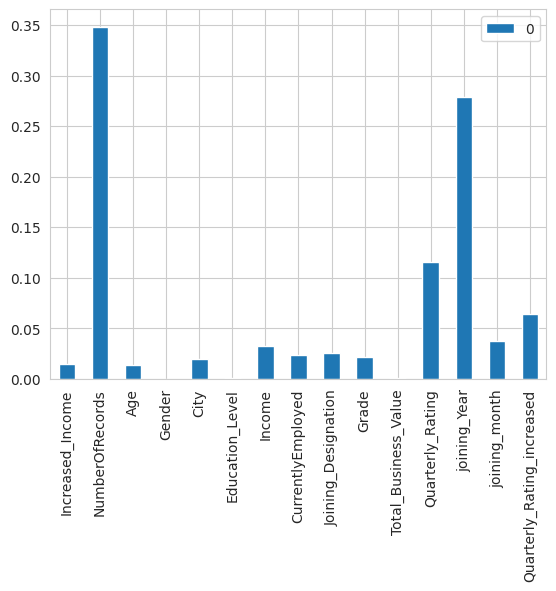

In [596]:
pd.DataFrame(data=RF.feature_importances_,
            index=X[numeric_cols].columns).plot(kind="bar")

In [597]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix



In [598]:
confusion_matrix(y_test,RF.predict(X_test) )

array([[162,   0],
       [315,   0]])

In [599]:
confusion_matrix(y_train,RF.predict(X_train) )

array([[ 561,   42],
       [ 201, 1100]])

In [600]:
f1_score(y_test,RF.predict(X_test)),f1_score(y_train,RF.predict(X_train))

(0.0, 0.9005321326238233)

In [601]:
precision_score(y_test,RF.predict(X_test)),precision_score(y_train,RF.predict(X_train))

(0.0, 0.9632224168126094)

In [602]:
recall_score(y_test,RF.predict(X_test)),recall_score(y_train,RF.predict(X_train))

(0.0, 0.8455034588777863)

## GridSearchCV - on RandomForestClassifier

In [603]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


In [ ]:
grid_search.fit(X_train,y_train.values.ravel())


In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,

    class_weight="balanced",
    ccp_alpha=0.0001,
    max_samples=None)

In [ ]:
RF.fit(X_train , y_train)

In [ ]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

In [ ]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


In [ ]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

## BaggingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging_classifier_model = BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth=7,
                                                                                     class_weight="balanced"),
                                            n_estimators=50,
                                            max_samples=1.0,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=False,
                                            oob_score=False,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)

In [ ]:
bagging_classifier_model.fit(X_train,y_train)

In [ ]:

from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix


In [ ]:
y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)

In [ ]:

confusion_matrix(y_test,y_test_pred)

In [ ]:

confusion_matrix(y_train,y_train_pred)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


In [ ]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

In [ ]:
bagging_classifier_model.score(X_test,y_test)

In [ ]:
bagging_classifier_model.score(X_train,y_train)

In [ ]:
# !pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[2,4,6,10],
             "n_estimators":[100,200,300,400]    }


grid_search = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


grid_search.fit(X_train,y_train.values.ravel())

grid_search.best_estimator_

grid_search.best_score_

grid_search.best_params_

In [ ]:
xgb = XGBClassifier(n_estimators=100,
                   max_depth = 2)
xgb.fit(X_train, y_train)

In [ ]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [ ]:
confusion_matrix(y_test,y_test_pred)

In [ ]:
confusion_matrix(y_train,y_train_pred)

In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test,y_test)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


In [ ]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


In [ ]:
xgb.feature_importances_

In [ ]:
pd.DataFrame(data=xgb.feature_importances_,
            index=X[numeric_cols].columns).plot(kind="bar")

## GradientBoostingClassifier

In [ ]:
def GradientBoostingClassifier(X, y):
    from sklearn.ensemble import  GradientBoostingClassifier
    from sklearn.metrics import f1_score, accuracy_score , roc_auc_score,auc,recall_score,precision_score
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)

    lr = GradientBoostingClassifier()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),'\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),'\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:,1], y_test)

In [ ]:
probs , y_test = GradientBoostingClassifier(X[numeric_cols],y)

In [ ]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()

def plot_roc(y_test,prob):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

In [ ]:
plot_roc(y_test , probs)

In [ ]:
plot_pre_curve(y_test , probs)

# Observations:

# Random Forest :

- train and test score : (0.8697478991596639, 0.8679245283018868)
- feature importance : highest is : joining year , followed by No of records available in data, and total business value.
- recall : 0.866
- precision: 0.928
- f1-score : 0.89

# Grid Search CV : RF :

- best params : ccp_alpha=0.001, max_depth=10, max_features=7,n_estimators=300
- Gridsearch RF best score : 0.8881417819617973

# Bagging Classfier(Decision Tree):

- With 50 DTs. max_depth=7, class_weight="balanced"
- f1 score : 0.9064039408866995
- precision : 0.9387755102040817
- recall_score : 0.8761904761904762
- accuracy: 0.880

# XGBoost Classifier (GridSearchCV): 'max_depth': 2, 'n_estimators': 100

- Test Scores:
- Accuracy : 0.87
- F1 score : 0.90
- Recall : 0.923
- Precision : 0.884
- Feature importance : Highest is the : joining year, followed by number of records available in data, and the total business value.

# GradientBoostingClassifier : GBDC:

- Train Score :  0.914390756302521
- Test Score :  0.8909853249475891
- Accuracy Score :  0.8909853249475891
- ROC-AUC score  test :   0.9447855910621867
- precision score  test :   0.9287925696594427
- Recall score  test :   0.9118541033434651
- f1 score  test  :   0.9202453987730062


# Insights:

1. Gender Distribution: There are more males (1380) than females (956) in the dataset.

2. Churn Distribution: The probability of churn is 67.87%, which indicates a high overall churn rate.

3. Influence of Education Level: Individuals with lower education levels (0 and 1) show a higher probability of churn compared to those with a higher education level (2).

4. Joining Destination: Individuals joining at destination 1 are more likely to churn.

5. Quarterly Rating: A quarterly rating of 1 significantly increases the probability of churn, as does an improvement in the quarterly rating throughout tenure.

6. Joining Year: Employees who joined in 2018 and 2019 are more likely to churn compared to those who joined in 2020 or before 2018.
Model Performance:

7. Random Forest shows a good balance between training and test scores, with notable feature importance attributed to the joining year, the number of records available in data, and total business value.

8. Bagging Classifier with Decision Trees and specific parameters achieves a higher f1-score, suggesting a better balance between precision and recall.

9. XGBoost Classifier presents a strong performance in terms of accuracy, f1-score, recall, and precision.

Gradient Boosting Classifier demonstrates excellent performance across multiple metrics, including the highest ROC-AUC score, indicating strong predictive capability.

#Recommendations:

1. Focus on Education and Joining Year: Tailor retention strategies based on education level and joining year, as these are strong indicators of churn.

2. Quarterly Rating Attention: Pay close attention to individuals with a quarterly rating of 1 or those whose rating improves, as they are at a higher risk of churn.

3. Enhanced Onboarding for Certain Destinations: Improve the onboarding process for individuals joining at high-risk destinations (like destination 1) to mitigate early churn.

4. Model Deployment: Consider deploying the Gradient Boosting Classifier as it shows robust performance across multiple metrics, including the highest precision and recall scores. However, the choice of model might also consider operational constraints and interpretability needs.

5. Continuous Monitoring and Evaluation: Regularly monitor the performance of deployed models and update them as new data becomes available to adapt to changing patterns in employee behavior.

#P.S: These insights can guide targeted interventions to reduce churn and improve retention strategies, tailoring efforts to the specific characteristics and behaviors identified as high risk.